In [1]:
# install seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

# All requested packages already installed.



In [2]:
# Import all the tools we need
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [55]:
df1= pd.read_excel("data/World_Bank_Projects_downloaded_6_14_2022.xls")
df1.shape

(21545, 27)

In [56]:
df1.head()

,"World Bank Projects, data as of 06/13/2022 22:00:02 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization


In [57]:
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header

In [58]:
df1.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df1 = df1.drop(index=1)
df1.head

<bound method NDFrame.head of 0     Project ID                       Region  \
2        P252350  Eastern and Southern Africa   
3        P252338        East Asia and Pacific   
4        P252337  Eastern and Southern Africa   
5        P179254   Western and Central Africa   
6        P179238   Western and Central Africa   
...          ...                          ...   
21540    P000019                       Africa   
21541    P000017                       Africa   
21542    P000010                       Africa   
21543    P000003                       Africa   
21544    P000001                       Africa   

0                                 Country Project Status  \
2                      Republic of Rwanda         Active   
3      Democratic Republic of Timor-Leste         Active   
4                       Republic of Kenya        Dropped   
5                    Republic of Cameroon       Pipeline   
6                        Republic of Chad       Pipeline   
...                  

In [130]:
df1 = df1.reset_index(drop=True)
df1.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
2,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Project ID                         21543 non-null  object
 1   Region                             21541 non-null  object
 2   Country                            21541 non-null  object
 3   Project Status                     21539 non-null  object
 4   Last Stage Reached Name            15196 non-null  object
 5   Project Name                       21542 non-null  object
 6   Project Development Objective      11580 non-null  object
 7   Implementing Agency                6649 non-null   object
 8   Consultant Services Required       1484 non-null   object
 9   Project URL                        21542 non-null  object
 10  Board Approval Date                18786 non-null  object
 11  Project Closing Date               16584 non-null  object
 12  Fina

In [132]:
df = df1.copy()

In [133]:
df.isna().sum()

0
Project ID                               0
Region                                   2
Country                                  2
Project Status                           4
Last Stage Reached Name               6347
Project Name                             1
Project Development Objective         9963
Implementing Agency                  14894
Consultant Services Required         20059
Project URL                              1
Board Approval Date                   2757
Project Closing Date                  4959
Financing Type                        8506
Current Project Cost                   148
IBRD Commitment                          1
IDA Commitment                           1
Total IDA and IBRD Commitment            1
Grant Amount                             1
Borrower                             15131
Lending Instrument                     249
Environmental Assessment Category     8461
Environmental and Social Risk        20268
Sector 1                              1916
Sector 2 

In [134]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Project ID
Region
Country
Project Status
Last Stage Reached Name
Project Name
Project Development Objective 
Implementing Agency
Consultant Services Required
Project URL
Board Approval Date
Project Closing Date
Financing Type
Current Project Cost
IBRD Commitment 
IDA Commitment
Total IDA and IBRD Commitment
Grant Amount
Borrower
Lending Instrument
Environmental Assessment Category
Environmental and Social Risk
Sector 1
Sector 2
Sector 3
Theme 1
Theme 2


In [135]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Project ID                         21543 non-null  category
 1   Region                             21541 non-null  category
 2   Country                            21541 non-null  category
 3   Project Status                     21539 non-null  category
 4   Last Stage Reached Name            15196 non-null  category
 5   Project Name                       21542 non-null  category
 6   Project Development Objective      11580 non-null  category
 7   Implementing Agency                6649 non-null   category
 8   Consultant Services Required       1484 non-null   category
 9   Project URL                        21542 non-null  category
 10  Board Approval Date                18786 non-null  category
 11  Project Closing Date               16584 

In [137]:
df.isnull().sum()/len(df)

0
Project ID                           0.000000
Region                               0.000093
Country                              0.000093
Project Status                       0.000186
Last Stage Reached Name              0.294620
Project Name                         0.000046
Project Development Objective        0.462470
Implementing Agency                  0.691361
Consultant Services Required         0.931115
Project URL                          0.000046
Board Approval Date                  0.127977
Project Closing Date                 0.230191
Financing Type                       0.394838
Current Project Cost                 0.006870
IBRD Commitment                      0.000046
IDA Commitment                       0.000046
Total IDA and IBRD Commitment        0.000046
Grant Amount                         0.000046
Borrower                             0.702363
Lending Instrument                   0.011558
Environmental Assessment Category    0.392749
Environmental and Social Risk   

In [138]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [139]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [140]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [141]:
# Check if there's any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [142]:
df.isna().sum()

0
Project ID                               0
Region                                   2
Country                                  2
Project Status                           4
Last Stage Reached Name               6347
Project Name                             1
Project Development Objective         9963
Implementing Agency                  14894
Consultant Services Required         20059
Project URL                              1
Board Approval Date                   2757
Project Closing Date                  4959
Financing Type                        8506
Current Project Cost                   148
IBRD Commitment                          1
IDA Commitment                           1
Total IDA and IBRD Commitment            1
Grant Amount                             1
Borrower                             15131
Lending Instrument                     249
Environmental Assessment Category     8461
Environmental and Social Risk        20268
Sector 1                              1916
Sector 2 

In [143]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Project ID
Region
Country
Project Status
Last Stage Reached Name
Project Name
Project Development Objective 
Implementing Agency
Consultant Services Required
Project URL
Board Approval Date
Project Closing Date
Financing Type
Current Project Cost
IBRD Commitment 
IDA Commitment
Total IDA and IBRD Commitment
Grant Amount
Borrower
Lending Instrument
Environmental Assessment Category
Environmental and Social Risk
Sector 1
Sector 2
Sector 3
Theme 1
Theme 2


In [144]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Project ID                                    21543 non-null  int16
 1   Region                                        21543 non-null  int8 
 2   Country                                       21543 non-null  int16
 3   Project Status                                21543 non-null  int8 
 4   Last Stage Reached Name                       21543 non-null  int8 
 5   Project Name                                  21543 non-null  int16
 6   Project Development Objective                 21543 non-null  int16
 7   Implementing Agency                           21543 non-null  int16
 8   Consultant Services Required                  21543 non-null  int8 
 9   Project URL                                   21543 non-null  int16
 10  Board Appr

In [146]:
df.isna().sum()

0
Project ID                                      0
Region                                          0
Country                                         0
Project Status                                  0
Last Stage Reached Name                         0
Project Name                                    0
Project Development Objective                   0
Implementing Agency                             0
Consultant Services Required                    0
Project URL                                     0
Board Approval Date                             0
Project Closing Date                            0
Financing Type                                  0
Current Project Cost                            0
IBRD Commitment                                 0
IDA Commitment                                  0
Total IDA and IBRD Commitment                   0
Grant Amount                                    0
Borrower                                        0
Lending Instrument                              

In [147]:
df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount_is_missing,Borrower_is_missing,Lending Instrument_is_missing,Environmental Assessment Category_is_missing,Environmental and Social Risk_is_missing,Sector 1_is_missing,Sector 2_is_missing,Sector 3_is_missing,Theme 1_is_missing,Theme 2_is_missing
0,21543,5,149,1,1,14123,2228,1832,0,21542,...,False,False,False,True,True,False,False,False,False,True
1,21542,4,25,1,1,13783,7376,2942,0,21541,...,False,False,False,False,True,False,False,True,True,True
2,21541,5,126,3,4,8767,8680,1516,0,21540,...,False,False,False,False,True,True,True,True,False,False
3,21540,11,99,4,0,2693,9214,0,0,21539,...,False,True,False,True,True,True,True,True,True,True
4,21539,11,100,4,0,2914,6289,0,0,21538,...,False,True,False,True,True,True,True,True,True,True


In [148]:
len(df)

21543

In [149]:
df.describe()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
count,21543.00000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.00000,...,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000
mean,10772.00000,7.092002,107.944669,2.023906,0.919046,9366.895233,2672.084575,715.801885,0.164369,10771.00000,...,60.474122,340.451144,10.633895,1.589333,0.182379,91.089356,30.825651,16.959012,21.401708,17.639094
std,6219.07276,2.490905,55.485928,0.631423,0.955340,5341.025586,3244.874637,1269.231057,0.642583,6219.07276,...,171.020180,609.575404,5.146618,1.633597,0.766743,49.088397,34.814938,27.625776,25.003966,24.220781
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5386.50000,5.000000,62.000000,2.000000,0.000000,4725.500000,0.000000,0.000000,0.000000,5385.50000,...,1.000000,0.000000,6.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000
50%,10772.00000,7.000000,115.000000,2.000000,1.000000,9305.000000,713.000000,0.000000,0.000000,10771.00000,...,1.000000,0.000000,13.000000,2.000000,0.000000,100.000000,21.000000,0.000000,7.000000,0.000000
75%,16157.50000,10.000000,150.000000,2.000000,1.000000,13932.000000,5321.500000,1039.500000,0.000000,16156.50000,...,1.000000,476.000000,15.000000,3.000000,0.000000,127.000000,60.000000,26.000000,44.000000,36.000000
max,21543.00000,11.000000,207.000000,4.000000,5.000000,18606.000000,9862.000000,4621.000000,3.000000,21542.00000,...,969.000000,2187.000000,18.000000,8.000000,4.000000,160.000000,102.000000,91.000000,73.000000,72.000000


In [150]:
df["Project Status"].value_counts()

2    15783
1     3088
3     1725
4      943
0        4
Name: Project Status, dtype: int64

In [154]:
df["Project Status"].replace({3: 0, 4:1, 2:0}, inplace=True)
print(df)

0      Project ID  Region  Country  Project Status  Last Stage Reached Name  \
0           21543       5      149               1                        1   
1           21542       4       25               1                        1   
2           21541       5      126               0                        4   
3           21540      11       99               1                        0   
4           21539      11      100               1                        0   
...           ...     ...      ...             ...                      ...   
21538           5       1        1               0                        0   
21539           4       1        1               0                        1   
21540           3       1        1               0                        0   
21541           2       1        1               0                        1   
21542           1       1        1               0                        1   

0      Project Name  Project Development Objective 

In [155]:
df["Project Status"].value_counts()

0    17512
1     4031
Name: Project Status, dtype: int64

In [153]:
df1["Project Status"].value_counts()

Closed      15783
Active       3088
Dropped      1725
Pipeline      943
Name: Project Status, dtype: int64

In [82]:
df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount_is_missing,Borrower_is_missing,Lending Instrument_is_missing,Environmental Assessment Category_is_missing,Environmental and Social Risk_is_missing,Sector 1_is_missing,Sector 2_is_missing,Sector 3_is_missing,Theme 1_is_missing,Theme 2_is_missing
0,21543,5,149,1,1,14123,2228,1832,0,21542,...,False,False,False,True,True,False,False,False,False,True
1,21542,4,25,1,1,13783,7376,2942,0,21541,...,False,False,False,False,True,False,False,True,True,True
2,21541,5,126,3,4,8767,8680,1516,0,21540,...,False,False,False,False,True,True,True,True,False,False
3,21540,11,99,4,0,2693,9214,0,0,21539,...,False,True,False,True,True,True,True,True,True,True
4,21539,11,100,4,0,2914,6289,0,0,21538,...,False,True,False,True,True,True,True,True,True,True


In [156]:
df.corr()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount_is_missing,Borrower_is_missing,Lending Instrument_is_missing,Environmental Assessment Category_is_missing,Environmental and Social Risk_is_missing,Sector 1_is_missing,Sector 2_is_missing,Sector 3_is_missing,Theme 1_is_missing,Theme 2_is_missing
0,,,,,,,,,,,,,,,,,,,,,
Project ID,1.000000,0.019678,-0.000765,0.625441,0.468647,-0.047972,0.656189,0.595781,0.363667,0.999735,...,0.011237,-0.707260,-0.001639,-0.014363,-0.381526,0.268353,-0.276399,-0.173262,-0.072382,0.011977
Region,0.019678,1.000000,-0.109376,0.034698,-0.016572,-0.030237,-0.008555,0.011941,0.024832,0.020125,...,-0.019399,-0.030206,0.005072,0.024635,-0.004320,0.015432,-0.010249,-0.025377,0.046529,0.031687
Country,-0.000765,-0.109376,1.000000,0.006279,0.005525,0.135991,0.003281,0.025163,0.005718,-0.000459,...,-0.013255,-0.001332,-0.024618,0.031480,-0.012368,0.011489,0.019020,0.015945,0.017101,0.030872
Project Status,0.625441,0.034698,0.006279,1.000000,0.159763,-0.031613,0.392550,0.473513,0.452962,0.625508,...,-0.003269,-0.569110,-0.019589,0.183963,-0.467791,0.286621,-0.095002,-0.037772,0.289622,0.260926
Last Stage Reached Name,0.468647,-0.016572,0.005525,0.159763,1.000000,-0.019518,0.331502,0.243920,0.184710,0.468796,...,-0.006555,-0.293640,0.034166,-0.237998,-0.251263,0.280133,-0.164228,-0.101837,-0.238232,-0.174145
Project Name,-0.047972,-0.030237,0.135991,-0.031613,-0.019518,1.000000,-0.031781,0.017218,-0.012070,-0.047697,...,-0.011949,0.012306,-0.015987,0.009772,-0.015362,0.003863,0.014053,0.011113,0.009033,-0.003905
Project Development Objective,0.656189,-0.008555,0.003281,0.392550,0.331502,-0.031781,1.000000,0.440697,0.234364,0.656315,...,-0.005611,-0.512434,-0.008924,-0.082485,-0.240432,0.133548,-0.249210,-0.166520,-0.129452,-0.071503
Implementing Agency,0.595781,0.011941,0.025163,0.473513,0.243920,0.017218,0.440697,1.000000,0.295716,0.595866,...,-0.003843,-0.791690,-0.051084,0.074949,-0.321191,0.179539,-0.183180,-0.109425,0.080699,0.085912
Consultant Services Required,0.363667,0.024832,0.005718,0.452962,0.184710,-0.012070,0.234364,0.295716,1.000000,0.363702,...,-0.001743,-0.359771,-0.027661,0.139531,-0.407298,0.270292,0.000432,0.020196,0.255758,0.205470


(54.5, -0.5)

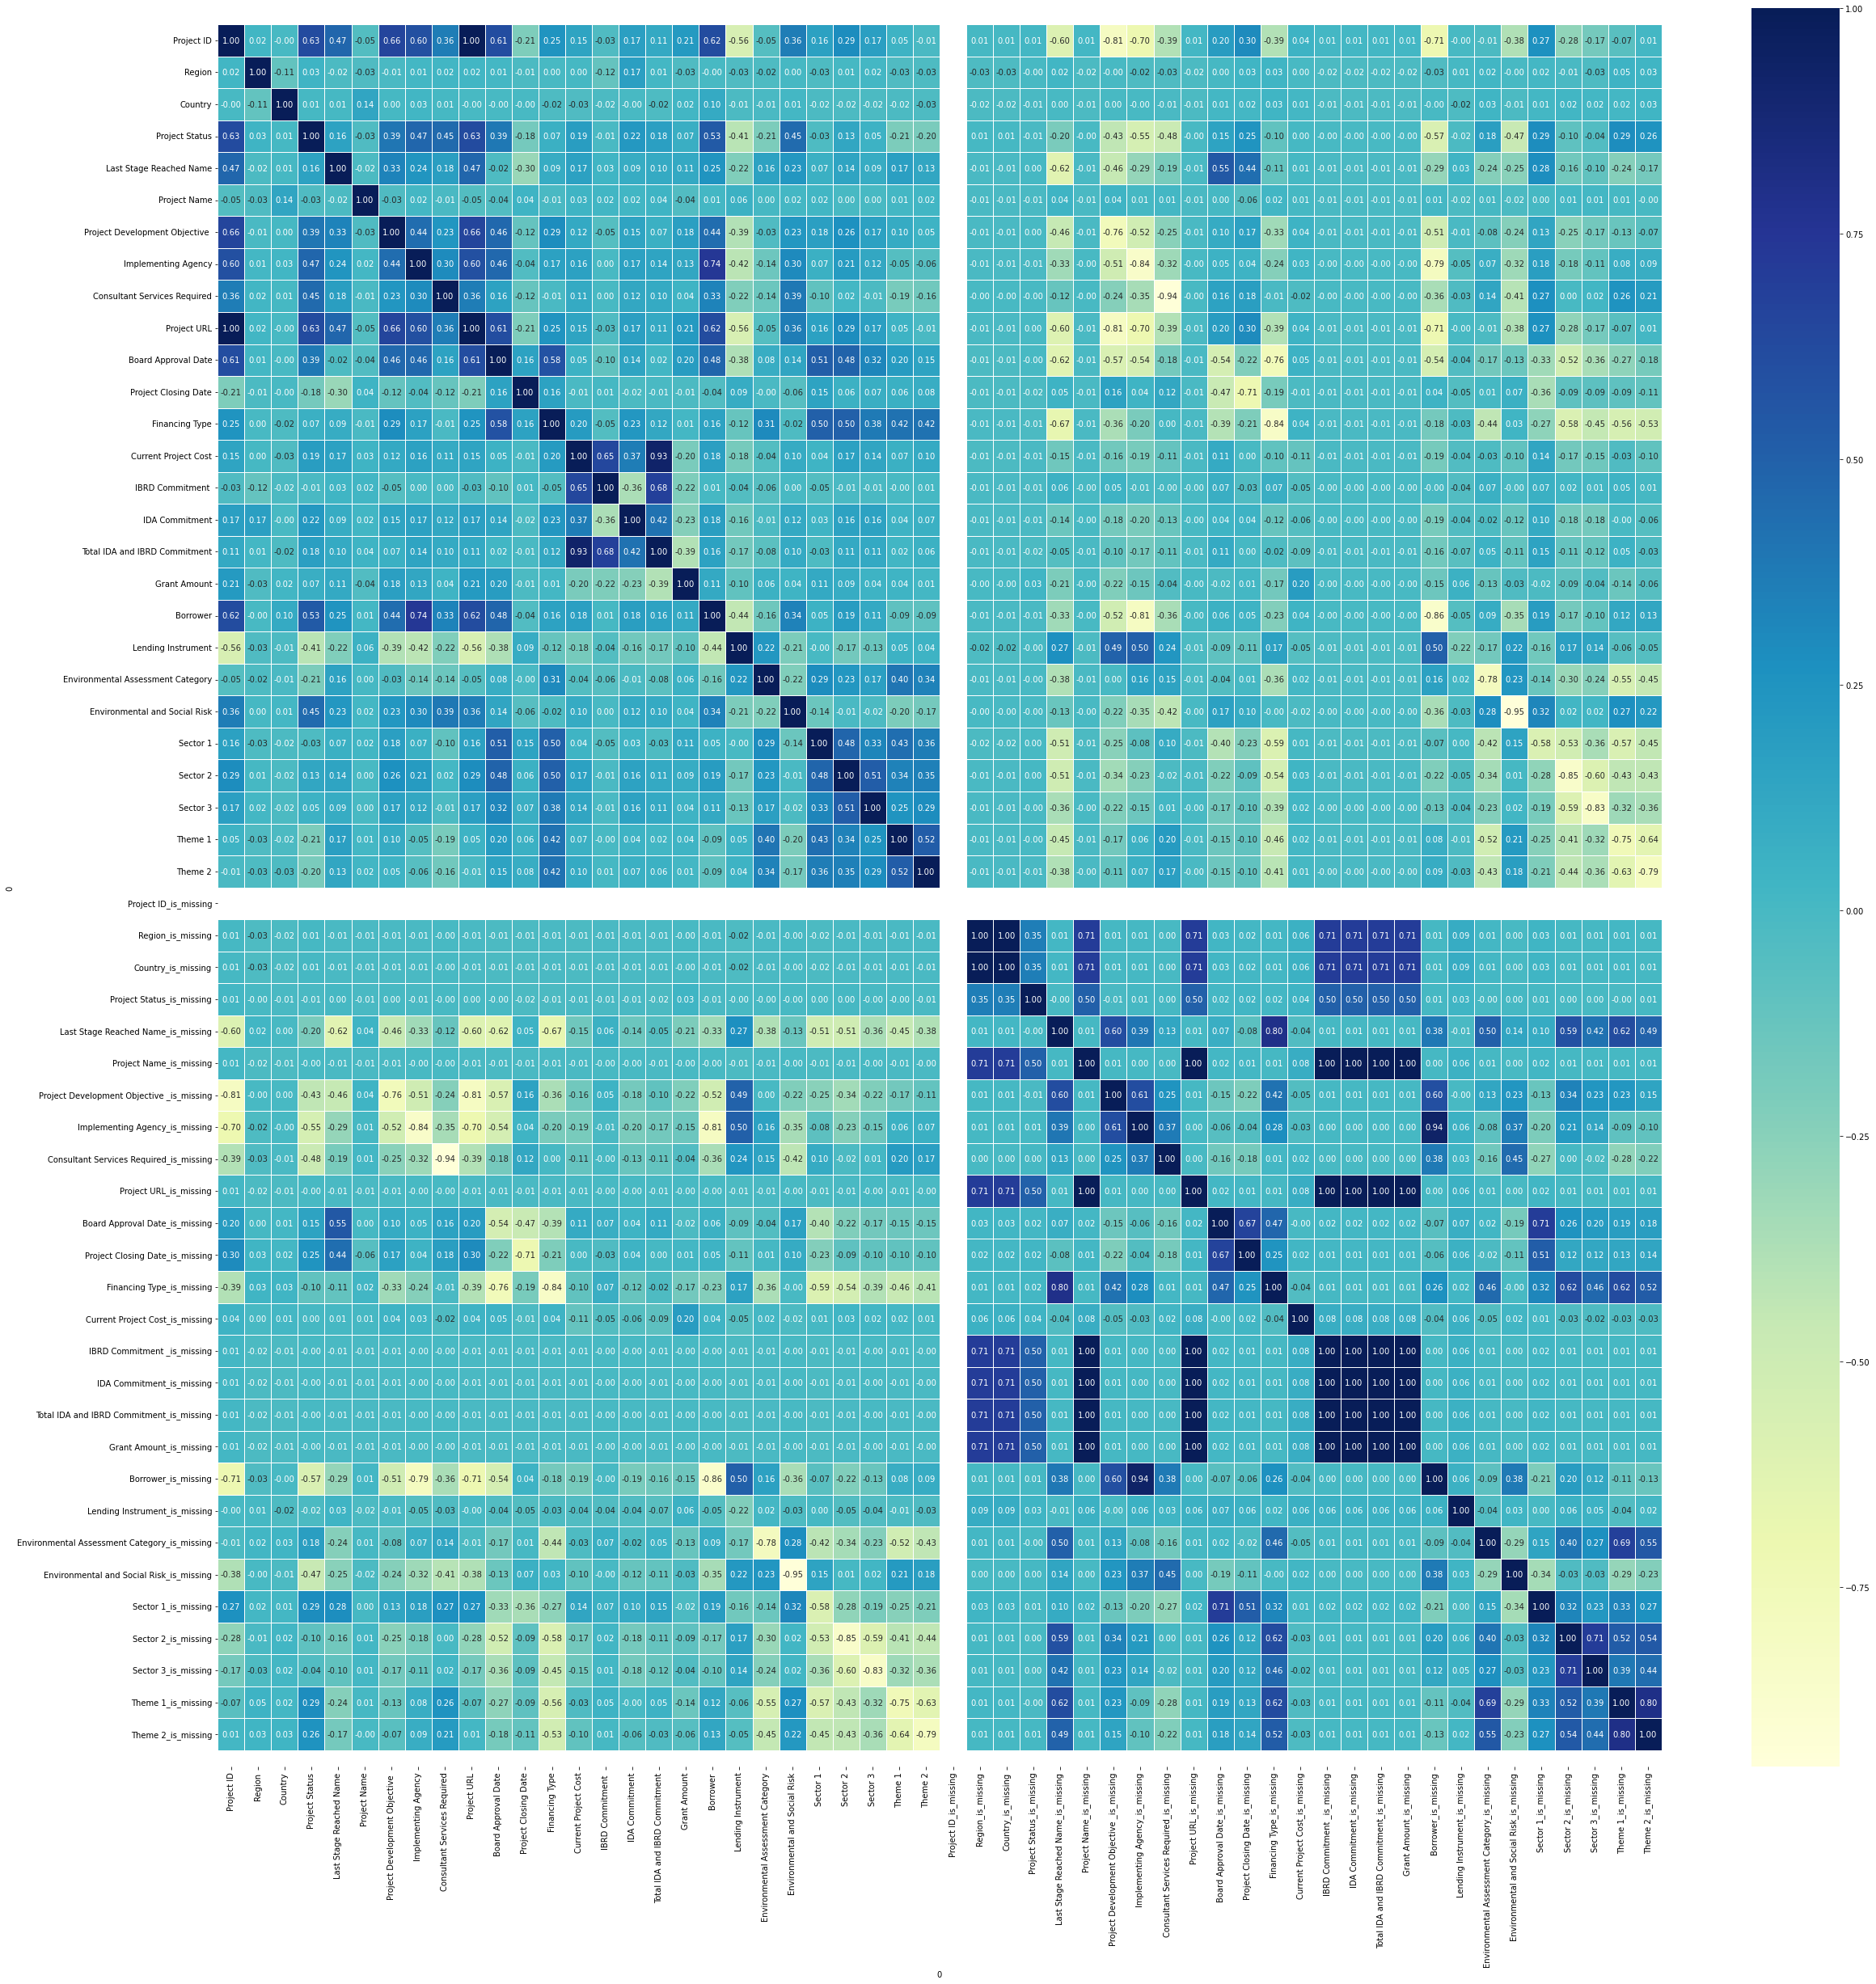

In [157]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(40, 40))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [158]:
# Set number of images to use for experimenting
NUM_DATA = 1000

In [159]:
X = df.drop("Project Status", axis=1)

y = df["Project Status"]

In [163]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_DATA],
                                                  y[:NUM_DATA],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [164]:
y_train, len(y_train)

(29     1
 535    1
 695    1
 557    1
 836    1
       ..
 106    1
 270    1
 860    1
 435    1
 102    1
 Name: Project Status, Length: 800, dtype: int8,
 800)

In [165]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [166]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.43142260385240194,
 'KNN': 0.1791598978881411,
 'Random Forest': 0.2446043165467626}

## Comparing Models

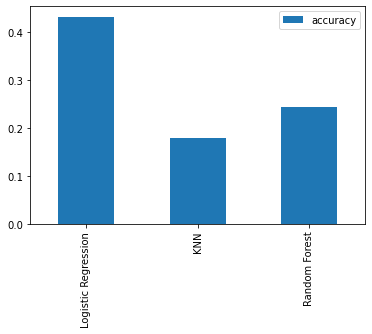

In [167]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning by RandomizedSearchCV

In [190]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-2, 2, 10),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 800,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10,2),
           "min_samples_leaf": np.arange(1, 10,2)}

In [191]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=2,
                                n_iter=50,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

RandomizedSearchCV(cv=2, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [192]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.6415888336127775}

In [193]:
rs_log_reg.score(X_test, y_test)

0.7159433743327919

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV..

In [203]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-2, 2, 10),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

In [204]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.0774263682681127, 'solver': 'liblinear'}

In [205]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7184961708052913

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [207]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [208]:
y_preds

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

C:\Users\Dell\Desktop\ml-projects\world-bank-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


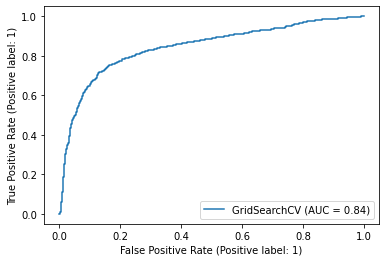

In [209]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [210]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[2455 1083]
 [ 130  641]]


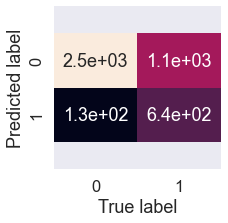

In [211]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [212]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80      3538
           1       0.37      0.83      0.51       771

    accuracy                           0.72      4309
   macro avg       0.66      0.76      0.66      4309
weighted avg       0.85      0.72      0.75      4309



### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [213]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0774263682681127, 'solver': 'liblinear'}

In [215]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.0774263682681127,
                         solver="liblinear")

In [216]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.43861685, 0.97493618, 0.98491529, 0.90320334, 0.82149489])

In [217]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8246333115913596

In [218]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8318794661948974

In [219]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.6818858560794044

In [220]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6063692345446319

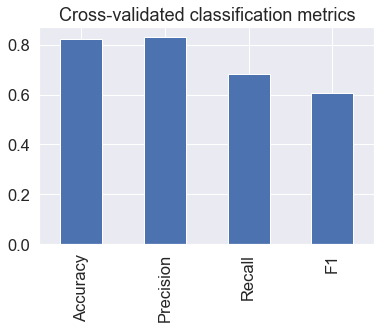

In [221]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [222]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [223]:
# Check coef_
clf.coef_

array([[-3.39588797e-04,  8.35551610e-02, -1.10601471e-02,
        -1.24259060e-01,  5.35699891e-05, -7.91732408e-06,
        -4.27268758e-04,  1.35565119e-01,  5.67631087e-04,
         9.07506721e-04, -2.36107542e-03, -2.04359001e-03,
         1.20866298e-04,  3.70071243e-02,  3.67085140e-02,
        -2.47474864e-02,  1.17075399e-03, -2.27700270e-04,
        -5.61109132e-02, -2.03486613e-03, -3.99022787e-02,
        -1.28712755e-02,  2.16012797e-03, -3.14154209e-02,
        -9.96911186e-02, -2.18048172e-02,  0.00000000e+00,
        -2.68089832e-06, -2.68089832e-06, -2.68089832e-06,
         4.28280283e-02, -2.68089832e-06, -2.68089832e-06,
        -1.27926961e-04, -5.13072673e-02, -2.68089832e-06,
        -1.72139502e-03,  4.70389903e-04,  1.59498294e-03,
        -1.00650638e-06, -2.68089832e-06, -2.68089832e-06,
        -2.68089832e-06, -2.68089832e-06,  3.25725597e-03,
        -2.68089832e-06, -2.87329526e-03,  9.99955269e-04,
        -9.14600578e-04,  3.05500722e-03, -4.73489028e-0

In [224]:
df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount_is_missing,Borrower_is_missing,Lending Instrument_is_missing,Environmental Assessment Category_is_missing,Environmental and Social Risk_is_missing,Sector 1_is_missing,Sector 2_is_missing,Sector 3_is_missing,Theme 1_is_missing,Theme 2_is_missing
0,21543,5,149,1,1,14123,2228,1832,0,21542,...,False,False,False,True,True,False,False,False,False,True
1,21542,4,25,1,1,13783,7376,2942,0,21541,...,False,False,False,False,True,False,False,True,True,True
2,21541,5,126,0,4,8767,8680,1516,0,21540,...,False,False,False,False,True,True,True,True,False,False
3,21540,11,99,1,0,2693,9214,0,0,21539,...,False,True,False,True,True,True,True,True,True,True
4,21539,11,100,1,0,2914,6289,0,0,21538,...,False,True,False,True,True,True,True,True,True,True


In [225]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Project ID': -0.00033958879716469264,
 'Region': 0.0835551609719641,
 'Country': -0.011060147120049343,
 'Project Status': -0.12425906003473632,
 'Last Stage Reached Name': 5.356998908369665e-05,
 'Project Name': -7.917324080064068e-06,
 'Project Development Objective ': -0.0004272687577151419,
 'Implementing Agency': 0.13556511884808015,
 'Consultant Services Required': 0.0005676310868327948,
 'Project URL': 0.0009075067211563993,
 'Board Approval Date': -0.0023610754189330885,
 'Project Closing Date': -0.002043590013946353,
 'Financing Type': 0.00012086629820664878,
 'Current Project Cost': 0.03700712434833922,
 'IBRD Commitment ': 0.0367085139955974,
 'IDA Commitment': -0.02474748642402044,
 'Total IDA and IBRD Commitment': 0.0011707539947725957,
 'Grant Amount': -0.0002277002700148704,
 'Borrower': -0.05611091318449384,
 'Lending Instrument': -0.0020348661261461068,
 'Environmental Assessment Category': -0.03990227874112662,
 'Environmental and Social Risk': -0.012871275509440182

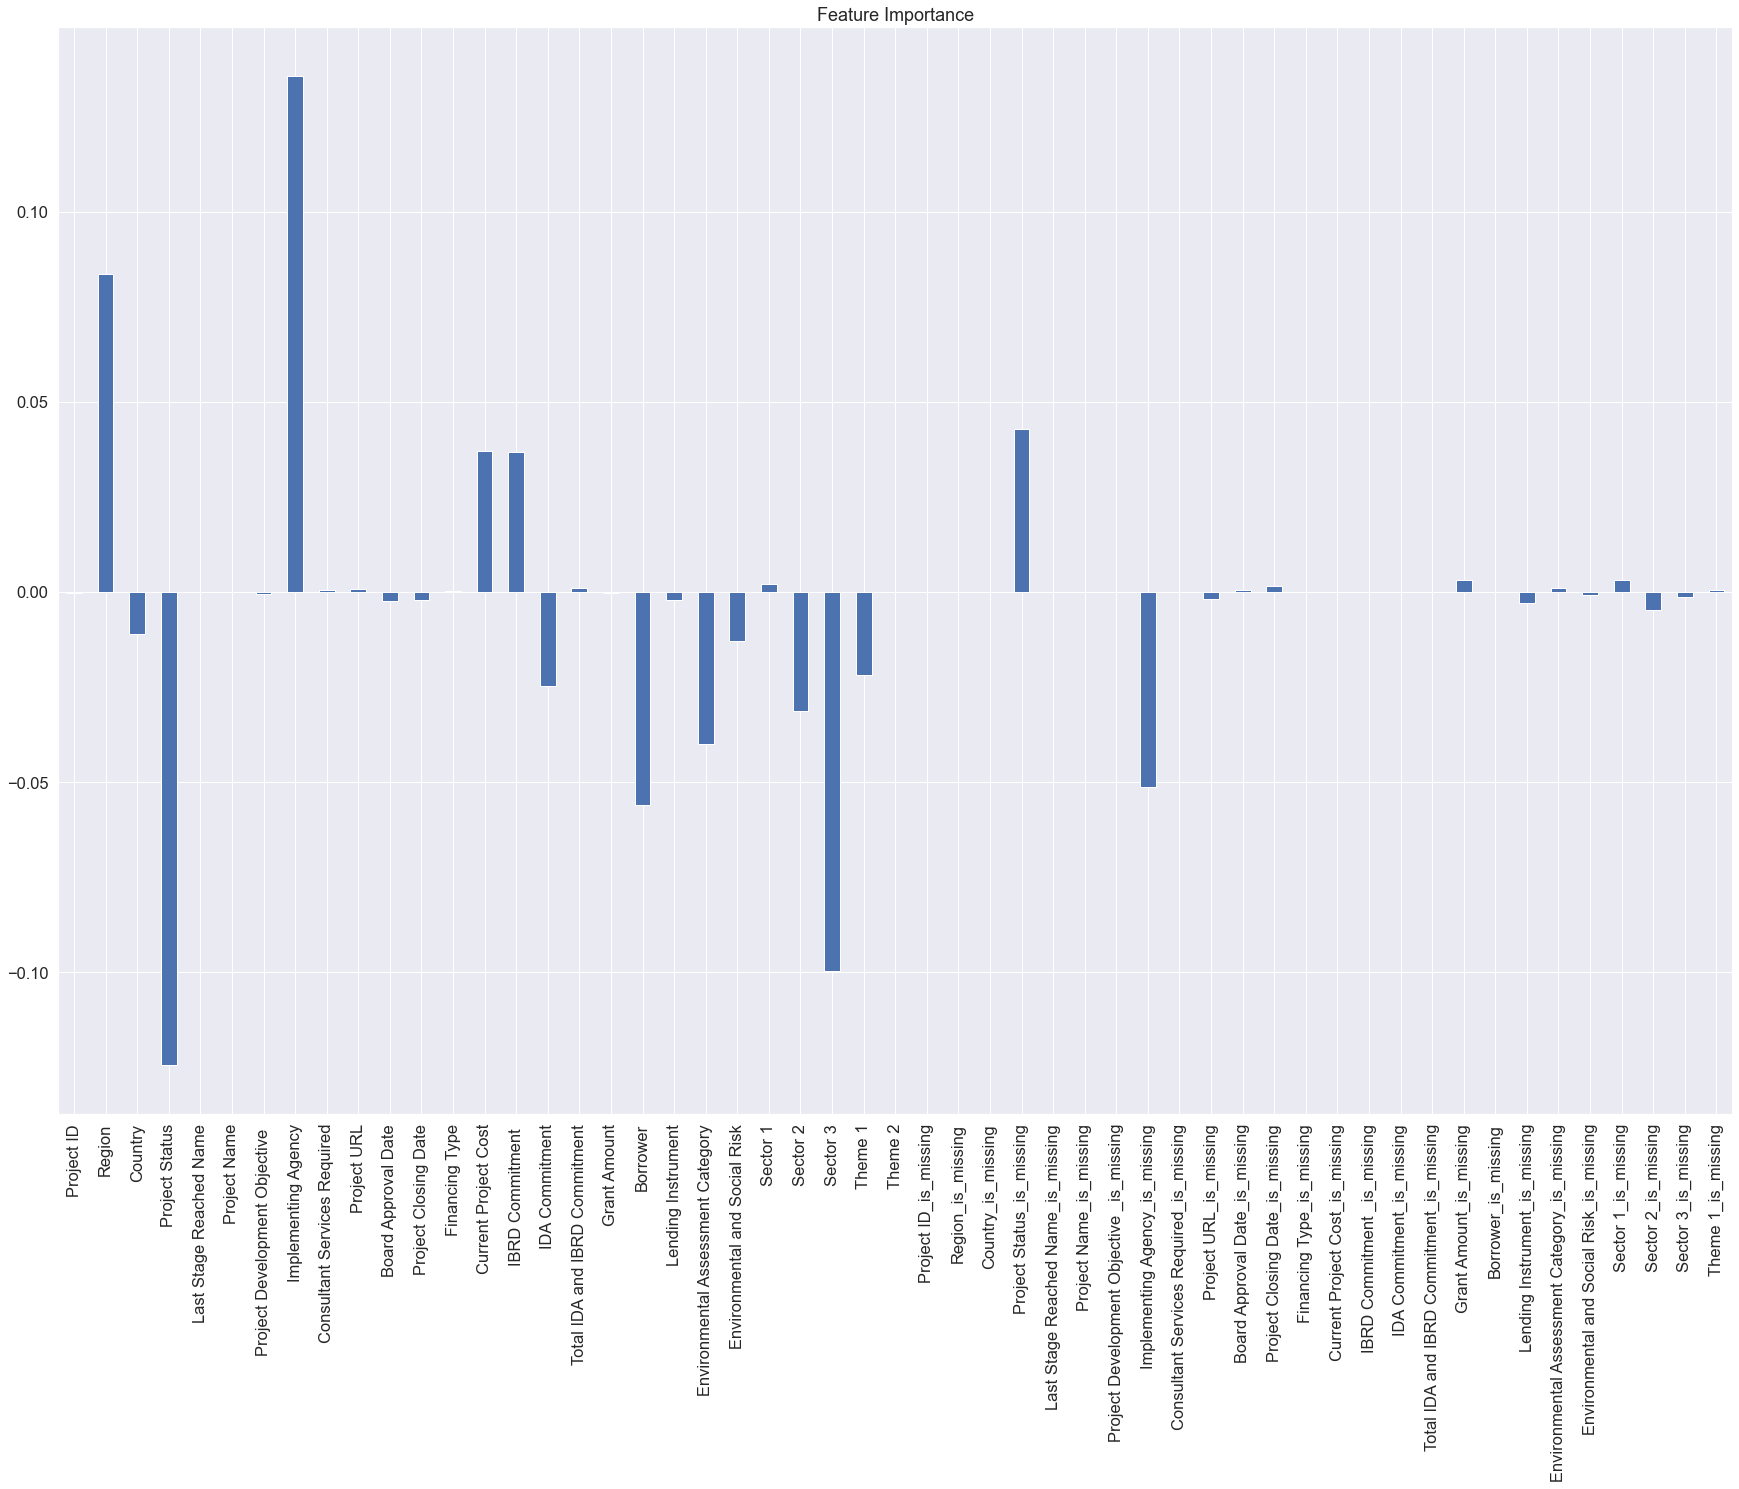

In [227]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(30,20));

**Note** We've only fitted our model on a small subset to save time we can always increase the dataset on train to increase its accuracy and score of other evaluation metrics